In [103]:
library(readr)
library(dplyr)
# install.packages("lessR")
library(lessR)
library(plotrix)
library(ggplot2)

In [2]:
setwd("D://Datasets")
df <- read.table(file="dns.txt", sep=",", header=F)

In [3]:
dim(df)
str(df)

[1] 40821591        3

'data.frame':	40821591 obs. of  3 variables:
 $ V1: int  2 2 6 15 18 31 35 38 42 42 ...
 $ V2: Factor w/ 15013 levels "C1","C10","C100",..: 11772 12413 1183 10952 8654 3825 12349 10952 8610 8610 ...
 $ V3: Factor w/ 13776 levels "C1","C10","C1000",..: 10895 3889 10408 7175 10895 6305 11032 7175 378 6305 ...


In [4]:
colnames(df) <- c("Time", "Source", "Dest")

In [5]:
head(df, 10)

Time,Source,Dest
2,C4653,C5030
2,C5782,C16712
6,C1191,C419
15,C3380,C22841
18,C2436,C5030
31,C161,C2109
35,C5642,C528
38,C3380,C22841
42,C2428,C1065
42,C2428,C2109


**Algorithm for mean partition:**

In [109]:
PartMean <- function(x=df$Source, n=500) {
    
    i<- 1
    t<- table(x)
    T<- length(t)/n
    len<- vector()
    med <- vector()

    while(length(t)>T) {
        len[i]<- length(t)
        m<- mean(t)
        med[i] <- m
        i<- 1+i
        t<- t[t>m]
        }

    len <- c(len, 0)
    med <- round(med)
    print("The partition lengths are:")
    print(len)
    print("The partitions have corresponding means:")
    print(med)
    print(t[order(t, decreasing=TRUE)])
    
    if(length(t)<=2 & length(t)>=1) {
        print("Potential outlier detected.")
    }
    }

In [42]:
PartMean()

[1] 15013  5109   640    71     0
[1]   2719   5293  17777 102330
x
   C585    C743   C1823   C5741   C3380  C17490   C1193  C22235   C2091    C561 
1624999 1149807  391719  350885  163298  162708  149849  144637  140060  138250 
  C8882    C395  C17640    C639 
 137691  130280  117486  113462 


In [13]:
i<- 1
t<- table(df$Source)
T<- length(t)/500
len<- vector()
med <- vector()

while(length(t)>T) {
 len[i]<- length(t)
    m<- mean(t)
     med[i] <- m
      i<- 1+i
        t<- t[t>m]
    }

len <- c(len, 0)
med <- round(med)

In [14]:
len
med
t

[1] 15013  5109   640    71     0

[1]   2719   5293  17777 102330


  C1193  C17490  C17640   C1823   C2091  C22235   C3380    C395    C561   C5741 
 149849  162708  117486  391719  140060  144637  163298  130280  138250  350885 
   C585    C639    C743   C8882 
1624999  113462 1149807  137691 

In [15]:
percentile <- vector(len=length(len)-1)
for(i in 1:length(len)-1) {
    percentile[i] <- len[i]-len[i+1]
}

In [16]:
percentile
perc <- c(percentile, length(t))
perc

[1] 9904 4469  569   71

[1] 9904 4469  569   71   14

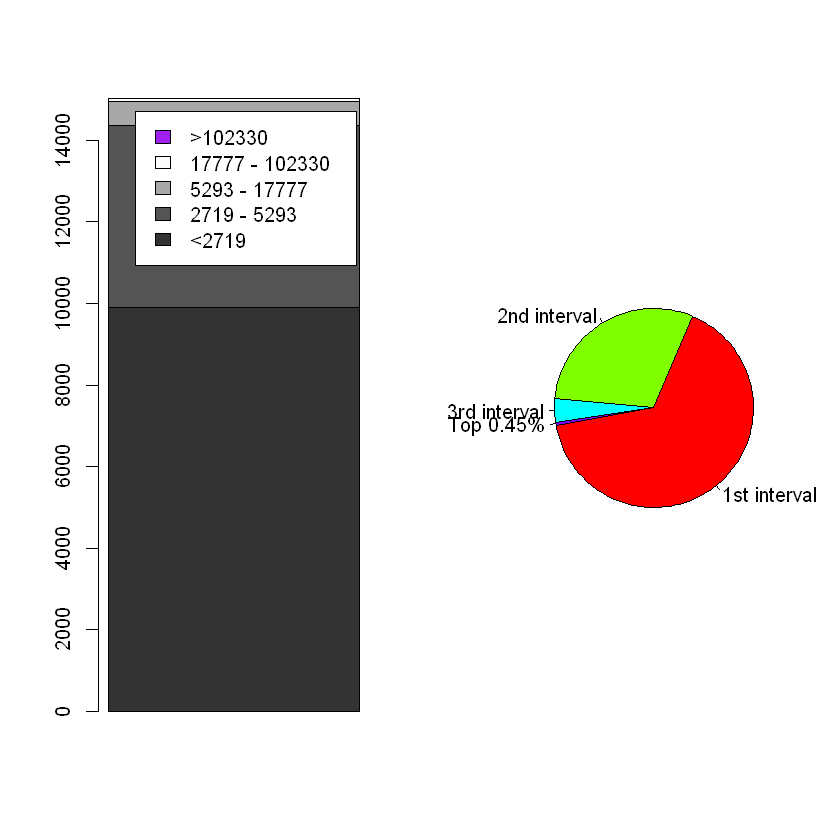

In [17]:
op <- par(mfrow=c(1,2))
barplot(as.matrix(perc),
       legend.text=c(paste0("<", med[1]), paste0(med[1], " - ", med[2]), paste0(med[2], " - ", med[3]), paste0(med[3], " - ", med[4]), paste0(">", med[4])),
       col=c("grey20", "grey33", "grey66", "grey99", "purple")) 
pie(percentile, 
labels=c("1st interval", "2nd interval", "3rd interval", "Top 0.45%"), 
col = rainbow(4), init.angle=190)
par(op)

In [18]:
identical(T*500, sum(percentile))

[1] TRUE

In [19]:
t<- t[order(t, decreasing=FALSE)]

In [20]:
t


   C639  C17640    C395   C8882    C561   C2091  C22235   C1193  C17490   C3380 
 113462  117486  130280  137691  138250  140060  144637  149849  162708  163298 
  C5741   C1823    C743    C585 
 350885  391719 1149807 1624999 

In [25]:
E <- nrow(df)
V <- length(unique(as.vector(c(df$Source,df$Dest))))
Density <- E/(V*(V-1))

In [90]:
Density ## VERY IMPORTANT: THIS IS THE 'COMPLEX GRAPH/MATROID DENSITY' - parallel + loops allowed.

[1] 0.1811273

In [28]:
df1 <- df[df$Source==names(t[1]), ]

In [29]:
head(df1)

,Time,Source,Dest
34124,52206,C639,C2390
78464,123606,C639,C2390
79806,124806,C639,C2390
81431,126606,C639,C2390
99546,149705,C639,C528
99551,149706,C639,C528


In [101]:
PartMean(df1$Dest, 861.025)

[1] "The partition lengths are:"
[1] 13776    16     0
[1] "The partitions have corresponding means:"
[1]    8 7090
C2390 
96775 
[1] "Potential outlier."


In [98]:
unique(df1$Dest)

[1] C2390  C528   C612   C2109  C467   C1685  C1065  C586   C5030  C706  
[11] C2660  C5736  C625   C457   C529   C5588  C231   C1707  C4222  C22529
[21] C5136  C5640 
13776 Levels: C1 C10 C1000 C10000 C10001 C10003 C10005 C10008 C1001 ... C9997

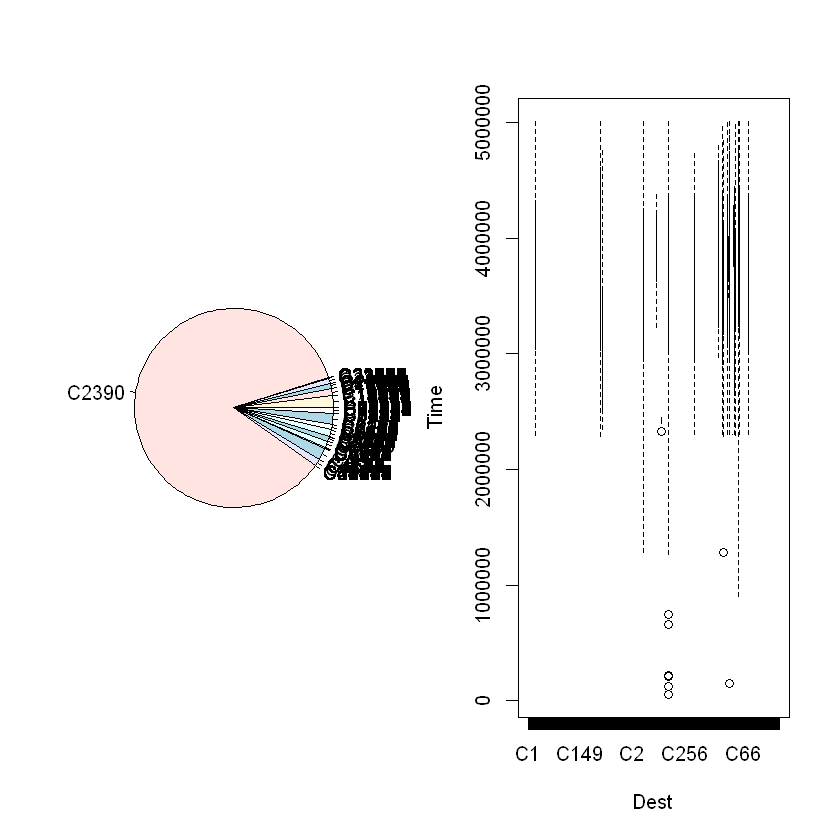

In [100]:
op <- par(mfrow=c(1,2))
pie(table(df1$Dest))
plot(Time ~ Dest, data=df1)
par(op)

Conclusion: Unusually high number of edges from 'C639' going to 'C2390'. Possible outlier, to be further evaluated on whole dataset.

We'll try iterating the procedure:

[1] "Examining source device: C17640"

[1] "The partition lengths are:"
[1] 13776    25     0
[1] "The partitions have corresponding means:"
[1]    9 4698
 C2189 
109273 
[1] "Potential outlier detected."

[1] "Examining source device: C395"

[1] "The partition lengths are:"
[1] 13776 10116  1623    49     0
[1] "The partitions have corresponding means:"
[1]   9  11  16 135
x
 C1685  C1707   C706  C1973  C2174   C612 C22783  C5030   C625   C457   C467 
  1230    840    754    603    579    435    320    181    170    148    142 
 C1065 
   141 



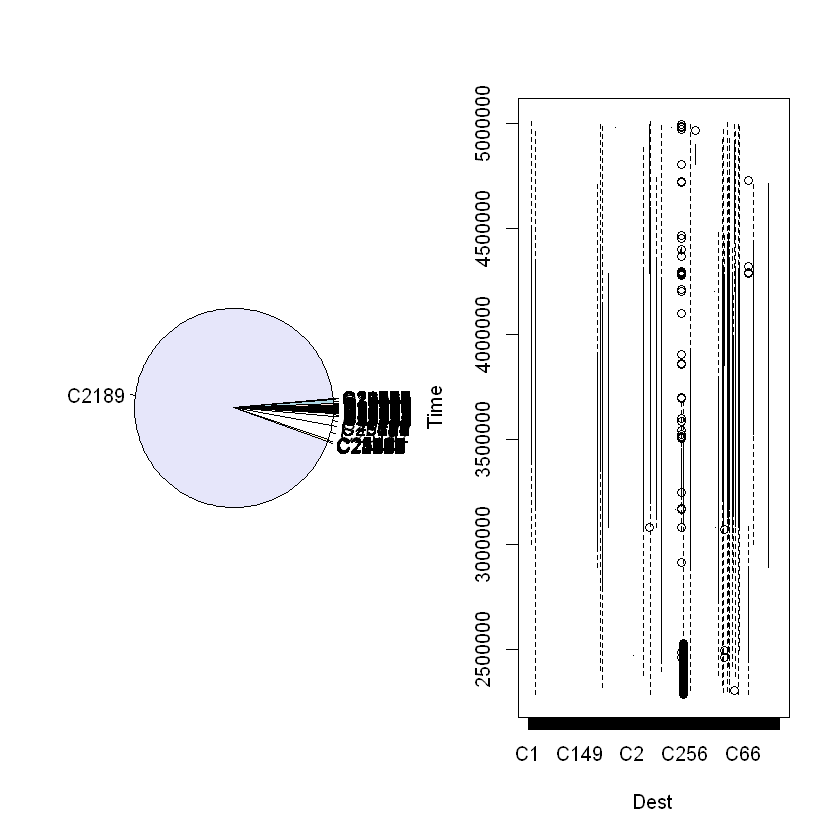

[1] "Examining source device: C8882"

[1] "The partition lengths are:"
[1] 13776    16     0
[1] "The partitions have corresponding means:"
[1]   10 8602
 C2189 
134605 
[1] "Potential outlier detected."

[1] "Examining source device: C561"

[1] "The partition lengths are:"
[1] 13776  9125  1320    45     0
[1] "The partitions have corresponding means:"
[1]  10  13  18 168
x
  C754  C1025   C231  C6360  C5030  C1685  C1707   C395 C22529  C5588 C25905 
   983    884    835    721    713    530    467    379    251    233    180 
 C5640 
   177 

[1] "Examining source device: C2091"

[1] "The partition lengths are:"
[1] 13776    17     0
[1] "The partitions have corresponding means:"
[1]   10 8238
 C2189 
136634 
[1] "Potential outlier detected."

[1] "Examining source device: C22235"

[1] "The partition lengths are:"
[1] 13776     0
[1] "The partitions have corresponding means:"
[1] 10
x
C22235  C9883  C5808 C21685 
141463   3077     24     17 

[1] "Examining source device: C1193"

[1]

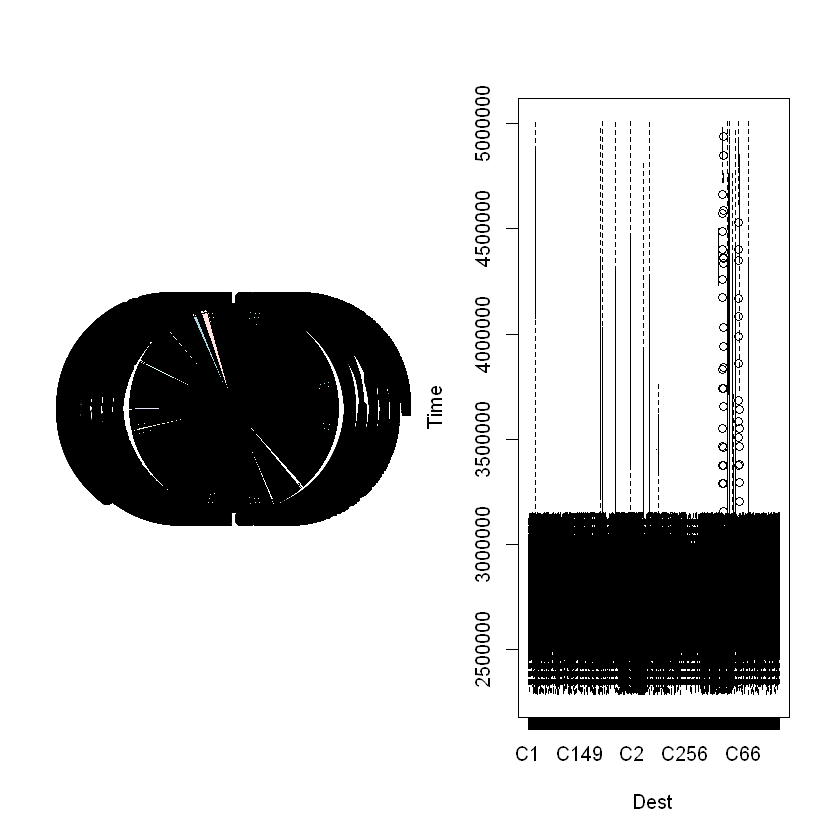

In [110]:
for(i in 2:length(t)){ 
    df1 <- df[df$Source==names(t[i]), ]
    print(paste0("Examining source device: ", names(t[i])))
    cat("\n")
    PartMean(df1$Dest, 950)
    cat("\n")
    op <- par(mfrow=c(1,2))
    pie(table(df1$Dest))
    plot(Time ~ Dest, data=df1)
    par(op)
    }

Combining the automated results we conclude the following:

1. Destination machine 'C2189' is a focal point of reception, receiving proportionally immense amounts of queries from **5/14** sources probed. The correspondent source machines are 'C17640', 'C8882', 'C2091', 'C1193' and 'C17490'.


2. We find that the following **3/14** source machines exhibit uniform distribution across receivers: 'C395', 'C561', 'C1823'.


3. The remaining **6/14** machines each present distinct outliers (i.e. other than 'C2189'). The source ~ principal receivers are as follows:


    - C639 to C2390

    - C22235 to itself (C22235)
    
    - C3380 to C22841
    
    - C5741 to itself (C5741)
    
    - C743 to C586
    
    - C585 to C586
    
None of the 14 devices examined featured both across highest sending activity as well as across highest receiving activity, with the exception of 'C22235' and 'C5741' which mainly sent packets to themselves. 